In [59]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df_16 = pd.read_csv('./mental-health-in-tech-2016/mental-heath-in-tech-2016_20161114.csv')

In [3]:
# Checking Variables and Inputs
# df_16 will be the RAW data
df_16.head(1)

,Are you self-employed?,How many employees does your company or organization have?,Is your employer primarily a tech company/organization?,Is your primary role within your company related to tech/IT?,Does your employer provide mental health benefits as part of healthcare coverage?,Do you know the options for mental health care available under your employer-provided coverage?,"Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?",Does your employer offer resources to learn more about mental health concerns and options for seeking help?,Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?,"If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:",...,"If you have a mental health issue, do you feel that it interferes with your work when being treated effectively?","If you have a mental health issue, do you feel that it interferes with your work when NOT being treated effectively?",What is your age?,What is your gender?,What country do you live in?,What US state or territory do you live in?,What country do you work in?,What US state or territory do you work in?,Which of the following best describes your work position?,Do you work remotely?
0,0,26-100,1.0,NaN,Not eligible for coverage / N/A,NaN,No,No,I don't know,Very easy,...,Not applicable to me,Not applicable to me,39,Male,United Kingdom,NaN,United Kingdom,NaN,Back-end Developer,Sometimes


In [4]:
# Making a duplicate DataFrame
df_check = pd.DataFrame(df_16)

In [7]:
df_check.isnull().sum()

Are you self-employed?                                                                                                                                                                 0
How many employees does your company or organization have?                                                                                                                           287
Is your employer primarily a tech company/organization?                                                                                                                              287
Is your primary role within your company related to tech/IT?                                                                                                                        1170
Does your employer provide mental health benefits as part of healthcare coverage?                                                                                                    287
Do you know the options for mental health care available under your employe

In [9]:
df_check.columns

Index(['Are you self-employed?',
       'How many employees does your company or organization have?',
       'Is your employer primarily a tech company/organization?',
       'Is your primary role within your company related to tech/IT?',
       'Does your employer provide mental health benefits as part of healthcare coverage?',
       'Do you know the options for mental health care available under your employer-provided coverage?',
       'Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?',
       'Does your employer offer resources to learn more about mental health concerns and options for seeking help?',
       'Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?',
       'If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:',
       'Do you think that dis

In [10]:
#Changing Names 
df_check.rename(columns={

#Job
        'Are you self-employed?': 'selfemployed',
       'How many employees does your company or organization have?': 'num_employees',
       'Is your employer primarily a tech company/organization?': 'tech_employer',
       'Is your primary role within your company related to tech/IT?': 'tech_role', ### Note: string

#Work+MH
       'Does your employer provide mental health benefits as part of healthcare coverage?': 'benefits', #
       'Do you know the options for mental health care available under your employer-provided coverage?': 'know_benefits', #
       'Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?' : 'disc_mh',#
       'Does your employer offer resources to learn more about mental health concerns and options for seeking help?': 'mh_edu',#
       'Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?': 'anon', #
       'If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:' : 'ease_askleave',
       'Do you think that discussing a mental health disorder with your employer would have negative consequences?' : 'disc_mhstigma', #
       'Do you think that discussing a physical health issue with your employer would have negative consequences?' : 'disc_phstigma',#
       'Would you feel comfortable discussing a mental health disorder with your coworkers?' : 'disc_coworkers', #
       'Would you feel comfortable discussing a mental health disorder with your direct supervisor(s)?': 'disc_superv', #
       'Do you feel that your employer takes mental health as seriously as physical health?': 'employer_mhph',    #
       'Have you heard of or observed negative consequences for co-workers who have been open about mental health issues in your workplace?': 'obs_coworkers', #
        'Do you have medical coverage (private insurance or state-provided) which includes treatment of  mental health issues?': 'mh_coverage',
#Reveal
       'Do you know local or online resources to seek help for a mental health disorder?': 'know_other_resources',
       'If you have been diagnosed or treated for a mental health disorder, do you ever reveal this to clients or business contacts?': 'reveal_clients',
       'If you have revealed a mental health issue to a client or business contact, do you believe this has impacted you negatively?': 'reveal_clients_impact',
       'If you have been diagnosed or treated for a mental health disorder, do you ever reveal this to coworkers or employees?': 'reveal_work',
       'If you have revealed a mental health issue to a coworker or employee, do you believe this has impacted you negatively?': 'reveal_work_impact',

#Productivity ---- DECISION TREE
       'Do you believe your productivity is ever affected by a mental health issue?': 'pdy',
       'If yes, what percentage of your work time (time performing primary or secondary job functions) is affected by a mental health issue?': 'pdy_pct',

#Previous Employers 'prv' ## 11 or the 11 are asked in regards to current employer
       'Do you have previous employers?' : 'prv_emp',
       'Have your previous employers provided mental health benefits?' : 'prv_benefits',
       'Were you aware of the options for mental health care provided by your previous employers?' : 'prv_know_benefits',
       'Did your previous employers ever formally discuss mental health (as part of a wellness campaign or other official communication)?': 'prv_disc_mh',
       'Did your previous employers provide resources to learn more about mental health issues and how to seek help?': 'prv_mh_edu' ,
       'Was your anonymity protected if you chose to take advantage of mental health or substance abuse treatment resources with previous employers?': 'prv_anon',            
       'Do you think that discussing a mental health disorder with previous employers would have negative consequences?': 'prv_disc_mhstigma',
       'Do you think that discussing a physical health issue with previous employers would have negative consequences?': 'prv_disc_phstigma',
       'Would you have been willing to discuss a mental health issue with your previous co-workers?': 'prv_disc_coworkers',
       'Would you have been willing to discuss a mental health issue with your direct supervisor(s)?': 'prv_disc_superv',
       'Did you feel that your previous employers took mental health as seriously as physical health?': 'prv_employer_mhph',
       'Did you hear of or observe negative consequences for co-workers with mental health issues in your previous workplaces?': 'prv_obs_coworkers',

#MH and Sharing
       'Would you be willing to bring up a physical health issue with a potential employer in an interview?': 'ph_int',
       'Why or why not?': 'ph_int_why',
       'Would you bring up a mental health issue with a potential employer in an interview?': 'mh_int',
       'Why or why not?.1': 'mh_int_why',
       'Do you feel that being identified as a person with a mental health issue would hurt your career?': 'mh_hurt_career',
       'Do you think that team members/co-workers would view you more negatively if they knew you suffered from a mental health issue?': 'team_mhstigma',
       'How willing would you be to share with friends and family that you have a mental illness?': 'share',
       'Have you observed or experienced an unsupportive or badly handled response to a mental health issue in your current or previous workplace?' : 'obs_bad_rxn',       
       'Have your observations of how another individual who discussed a mental health disorder made you less likely to reveal a mental health issue yourself in your current workplace?': 'rxn_coworker',

#History
       'Do you have a family history of mental illness?': 'mh_fam_history',                   
       'Have you had a mental health disorder in the past?': 'mh_history',

#MH Disorder --- DECISION TREE
       'Do you currently have a mental health disorder?': 'mhnow',      
       'If yes, what condition(s) have you been diagnosed with?': 'mhnow_cond',
       'If maybe, what condition(s) do you believe you have?': 'mhnow_selfdiag',

#MH Professional Diagnosis --- DECISION TREE
       'Have you been diagnosed with a mental health condition by a medical professional?': 'diag',
       'If so, what condition(s) were you diagnosed with?': 'diag_cond',
    
#Treatment
       'Have you ever sought treatment for a mental health issue from a mental health professional?': 'treat',
       'If you have a mental health issue, do you feel that it interferes with your work when being treated effectively?' : 'treat_effective',
       'If you have a mental health issue, do you feel that it interferes with your work when NOT being treated effectively?': 'treat_noteffective',

#Work/Demographics
        'What is your age?': 'age',
        'What is your gender?': 'gender',
       'What country do you live in?': 'country',
       'What US state or territory do you live in?': 'state',
       'What country do you work in?': 'country_work',
       'What US state or territory do you work in?': 'state_work',
       'Which of the following best describes your work position?': 'work',
       'Do you work remotely?': 'remote'}, inplace=True)

In [11]:
df_check.columns

Index(['selfemployed', 'num_employees', 'tech_employer', 'tech_role',
       'benefits', 'know_benefits', 'disc_mh', 'mh_edu', 'anon',
       'ease_askleave', 'disc_mhstigma', 'disc_phstigma', 'disc_coworkers',
       'disc_superv', 'employer_mhph', 'obs_coworkers',
       'Do you have medical coverage (private insurance or state-provided) which includes treatment of  mental health issues?',
       'know_other_resources', 'reveal_clients', 'reveal_clients_impact',
       'reveal_work', 'reveal_work_impact', 'pdy', 'pdy_pct', 'prv_emp',
       'prv_benefits', 'prv_know_benefits', 'prv_disc_mh', 'prv_mh_edu',
       'prv_anon', 'prv_disc_mhstigma', 'prv_disc_phstigma',
       'prv_disc_coworkers', 'prv_disc_superv', 'prv_employer_mhph',
       'prv_obs_coworkers', 'ph_int', 'ph_int_why', 'mh_int', 'mh_int_why',
       'mh_hurt_career', 'team_mhstigma', 'share', 'obs_bad_rxn',
       'rxn_coworker', 'mh_fam_history', 'mh_history', 'mhnow', 'mhnow_cond',
       'mhnow_selfdiag', 'diag', 'd

In [26]:
# Fixing Column with long name:
df_check.rename(columns={'Do you have medical coverage (private insurance or state-provided) which includes treatment of \xa0mental health issues?': 'mh_coverage'}, inplace=True)
# Checking if it worked:
df_check.iloc[:,16].name

'mh_coverage'

In [28]:
# Making the dataframe naming scheme easier: 'df'
df = pd.DataFrame(df_check)
df.columns

Index(['selfemployed', 'num_employees', 'tech_employer', 'tech_role',
       'benefits', 'know_benefits', 'disc_mh', 'mh_edu', 'anon',
       'ease_askleave', 'disc_mhstigma', 'disc_phstigma', 'disc_coworkers',
       'disc_superv', 'employer_mhph', 'obs_coworkers', 'mh_coverage',
       'know_other_resources', 'reveal_clients', 'reveal_clients_impact',
       'reveal_work', 'reveal_work_impact', 'pdy', 'pdy_pct', 'prv_emp',
       'prv_benefits', 'prv_know_benefits', 'prv_disc_mh', 'prv_mh_edu',
       'prv_anon', 'prv_disc_mhstigma', 'prv_disc_phstigma',
       'prv_disc_coworkers', 'prv_disc_superv', 'prv_employer_mhph',
       'prv_obs_coworkers', 'ph_int', 'ph_int_why', 'mh_int', 'mh_int_why',
       'mh_hurt_career', 'team_mhstigma', 'share', 'obs_bad_rxn',
       'rxn_coworker', 'mh_fam_history', 'mh_history', 'mhnow', 'mhnow_cond',
       'mhnow_selfdiag', 'diag', 'diag_cond', 'treat', 'treat_effective',
       'treat_noteffective', 'age', 'gender', 'country', 'state',
       '

In [29]:
df.dtypes

selfemployed               int64
num_employees             object
tech_employer            float64
tech_role                float64
benefits                  object
know_benefits             object
disc_mh                   object
mh_edu                    object
anon                      object
ease_askleave             object
disc_mhstigma             object
disc_phstigma             object
disc_coworkers            object
disc_superv               object
employer_mhph             object
obs_coworkers             object
mh_coverage              float64
know_other_resources      object
reveal_clients            object
reveal_clients_impact     object
reveal_work               object
reveal_work_impact        object
pdy                       object
pdy_pct                   object
prv_emp                    int64
prv_benefits              object
prv_know_benefits         object
prv_disc_mh               object
prv_mh_edu                object
prv_anon                  object
          

In [33]:



#### GOING TO CLEAN SOME DATA :)

In [34]:

# Looking at Gender

df.gender.describe()

count     1430
unique      70
top       Male
freq       610
Name: gender, dtype: object

In [35]:
df.gender.value_counts()

Male                                                                                                                                                             610
male                                                                                                                                                             249
Female                                                                                                                                                           153
female                                                                                                                                                            95
M                                                                                                                                                                 86
m                                                                                                                                                                 79
F         

In [36]:
# There is a lot of unique entries. All are string. Going to categorize...
df['gender'] = df['gender'].replace([
    'male', 'Male ', 'M', 'm', 'man', 'Cis male',
    'Male.', 'Male (cis)', 'Man', 'Sex is male',
    'cis male', 'Malr', 'Dude', "I'm a man why didn't you make this a drop down question. You should of asked sex? And I would of answered yes please. Seriously how much text can this take? ",
    'mail', 'M|', 'male ', 'Cis Male', 'Male (trans, FtM)',
    'cisdude', 'cis man', 'MALE'], 'Male')
df['gender'] = df['gender'].replace([
    'female', 'I identify as female.', 'female ',
    'Female assigned at birth ', 'F', 'Woman', 'fm', 'f',
    'Cis female', 'Transitioned, M2F', 'Female or Multi-Gender Femme',
    'Female ', 'woman', 'female/woman', 'Cisgender Female', 
    'mtf', 'fem', 'Female (props for making this a freeform field, though)',
    ' Female', 'Cis-woman', 'AFAB', 'Transgender woman',
    'Cis female '], 'Female')
df['gender'] = df['gender'].replace([
    'Bigender', 'non-binary,', 'Genderfluid (born female)',
    'Other/Transfeminine', 'Androgynous', 'male 9:1 female, roughly',
    'nb masculine', 'genderqueer', 'Human', 'Genderfluid',
    'Enby', 'genderqueer woman', 'Queer', 'Agender', 'Fluid',
    'Genderflux demi-girl', 'female-bodied; no feelings about gender',
    'non-binary', 'Male/genderqueer', 'Nonbinary', 'Other', 'none of your business',
    'Unicorn', 'human', 'Genderqueer'], 'Genderqueer/Other')

In [38]:
df.gender.value_counts(dropna=False)

Male                 1058
Female                343
Genderqueer/Other      29
NaN                     3
Name: gender, dtype: int64

In [41]:
# Looking at Age

df.age.describe()

count    1433.000000
mean       34.286113
std        11.290931
min         3.000000
25%        28.000000
50%        33.000000
75%        39.000000
max       323.000000
Name: age, dtype: float64

In [42]:
# There are some weird extremes in age. Let's look for outliers and if they are reasonable for our demographic.
print(df.loc[df['age'] > 70, ['age']])
print(df.loc[df['age'] < 18, ['age']])

      age
372    99
564   323
1117   74
     age
93    17
656    3
808   15


In [54]:
# Removing outliers
df.drop(df.index[[372,564,1117,93,656,808]], inplace=True)

In [58]:
print(df.loc[df['age'] > 70, ['age']])
print(df.loc[df['age'] < 18, ['age']])

Empty DataFrame
Columns: [age]
Index: []
Empty DataFrame
Columns: [age]
Index: []


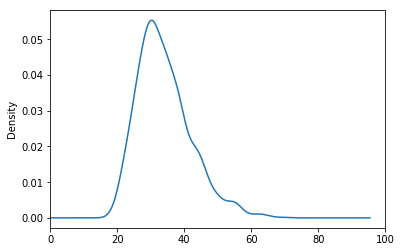

In [60]:
df.age.plot(kind='density', xlim=(0,100));

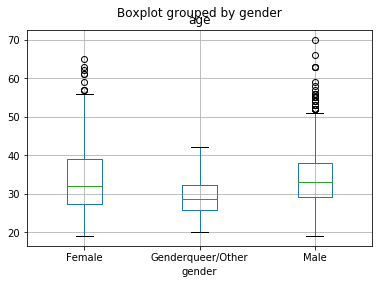

In [62]:
df.boxplot(column='age', by='gender');